In [1]:
import xmitgcm as xmit

In [5]:
import matplotlib.pyplot as plt

In [6]:
import xarray as xr

In [7]:
ds = xmit.open_mdsdataset("../../data/SimRockallTrough/")

Mreal = 16. #kg
Mtotal = (ds["PTRACER01"]*(ds['rA']*ds['drF']*ds['hFacC'])).isel(time=0).sum(["XC", "YC", "Z"]).values
ds["PTRACER01"] *= Mreal/Mtotal

/Users/hdrake/opt/anaconda3/envs/bblturb-analysis/lib/python3.9/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in ../../data/SimRockallTrough/ or ../../data/SimRockallTrough/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


(54.0, 55.5)

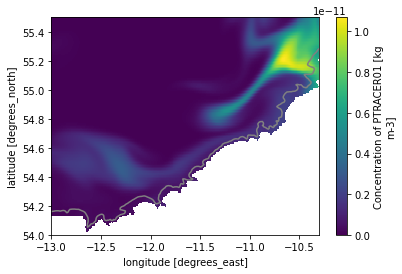

In [8]:
(ds["PTRACER01"].where(ds['hFacC']!=0.)).isel(time=-1).sel(Z=-1500, method="nearest").plot()
ds['Depth'].plot.contour(levels=[1800], colors="grey")

plt.xlim(-13, -10.3)
plt.ylim(54, 55.5)

In [ ]:
plt.figure(figsize=(10, 4))
(ds["PTRACER01"].where(ds['hFacC']!=0.)).isel(time=-1).sel(XC=-11.5, method="nearest").plot()
plt.ylim([-2800, -500])

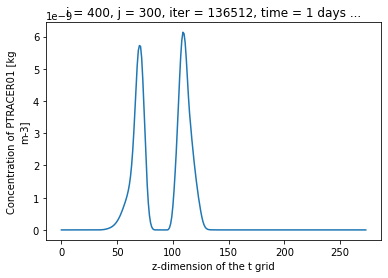

In [54]:
(ds["PTRACER01"].where(hFacC['hFacC']!=0.)).isel(time=-1, j=300, i=400).plot()

In [49]:
XC = xmit.utils.read_mds("../../data/SimRockallTrough/XC")

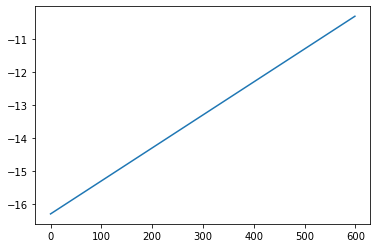

In [60]:
import matplotlib.pyplot as plt
plt.plot(XC["XC"][0, :])

In [34]:
ds.rename({"i":"XC"}).assign_coords({"XC": XC})

MissingDimensionsError: cannot set variable 'XC' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.